In [774]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns


In [775]:

import pandas as pd

X_train = pd.read_csv('C:/Users/Vamaxi Maheshwari/Desktop/training_set_features.csv', index_col = 'respondent_id')
X_train.drop(['education', 'race','rent_or_own','employment_status'], axis=1, inplace= True)


In [776]:
y_train = pd.read_csv(r'C:\Users\Vamaxi Maheshwari\Desktop\training_set_labels.csv', index_col = 'respondent_id')

In [777]:
y_test = pd.read_csv(r"C:\Users\Vamaxi Maheshwari\Desktop\submission_format.csv")
y_test.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


In [778]:
X_test = pd.read_csv(r'C:\Users\Vamaxi Maheshwari\Desktop\test_set_features.csv', index_col = 'respondent_id')
X_test.drop(['education', 'race','rent_or_own','employment_status'], axis=1, inplace= True)


In [779]:
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Print the names of categorical columns
print(categorical_columns)

Index(['age_group', 'sex', 'income_poverty', 'marital_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupation'],
      dtype='object')


In [780]:
X_train.age_group.unique()


array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

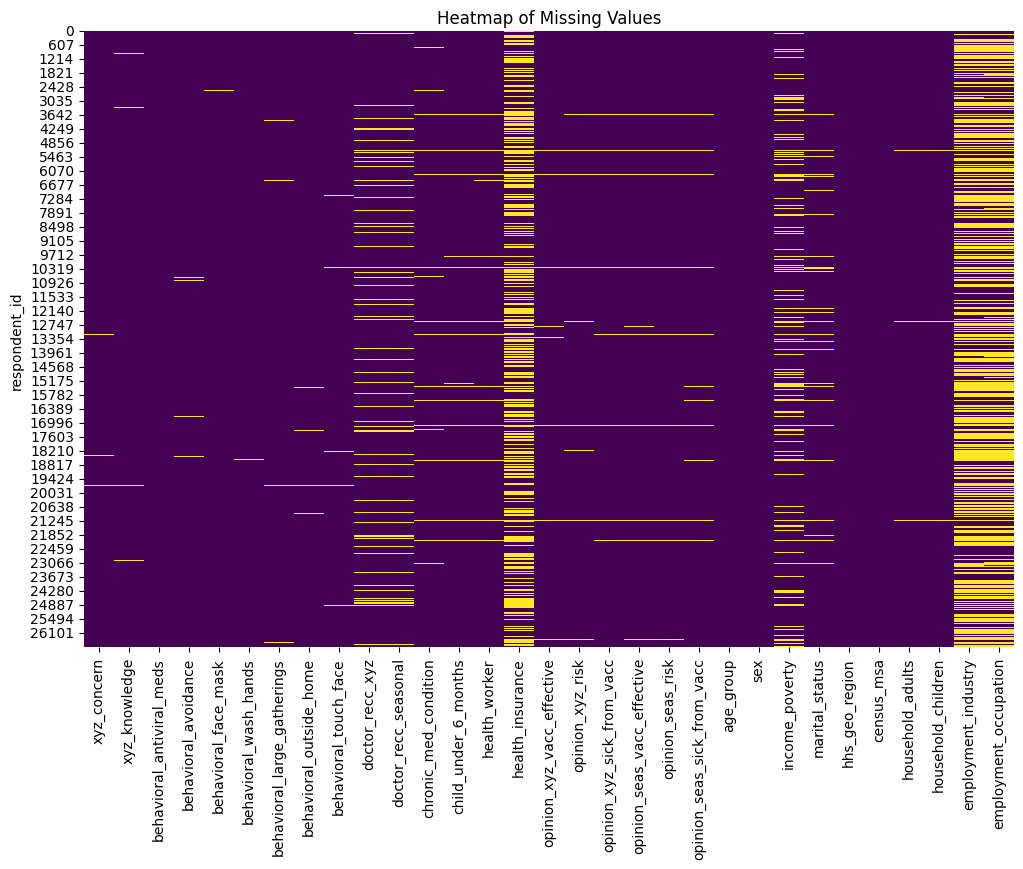

In [781]:
null_shape = X_train.isnull().columns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create a binary DataFrame indicating missing values
missing_values = X_train.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data=missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()







In [782]:
X_train.drop(['health_insurance', 'employment_industry', 'employment_occupation'], axis=1, inplace=True)
print(X_train.columns)


Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'income_poverty', 'marital_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')


In [783]:

null_shape = X_train.isnull().columns
print(null_shape)

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'income_poverty', 'marital_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')


In [784]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Replace null values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_columns] = imputer.fit_transform(X_train[categorical_columns])

# Verify that null values are replaced
print(X_train[categorical_columns].isnull().sum())


age_group         0
sex               0
income_poverty    0
marital_status    0
hhs_geo_region    0
census_msa        0
dtype: int64


In [785]:
print(X_train.columns)

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'income_poverty', 'marital_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')


In [786]:
print(categorical_columns)

Index(['age_group', 'sex', 'income_poverty', 'marital_status',
       'hhs_geo_region', 'census_msa'],
      dtype='object')


In [787]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_train[['sex']])
# Transform 'sex' column and replace original 'sex' column
X_train['sex'] = ord_enc.transform(X_train[['sex']])
X_train.sex.head(5)


respondent_id
0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: sex, dtype: float64

In [788]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_train[['marital_status']])
# Transform 'sex' column and replace original 'sex' column
X_train['marital_status'] = ord_enc.transform(X_train[['marital_status']])
X_train.marital_status.head(5)

respondent_id
0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: marital_status, dtype: float64

In [789]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_train[['hhs_geo_region']])
# Transform 'sex' column and replace original 'sex' column
X_train['hhs_geo_region'] = ord_enc.transform(X_train[['hhs_geo_region']])
X_train.hhs_geo_region.head(5)

respondent_id
0    8.0
1    1.0
2    9.0
3    5.0
4    9.0
Name: hhs_geo_region, dtype: float64

In [790]:
# Assuming X_train is your DataFrame
unique_values_count = X_train['census_msa'].unique()
print("Number of unique values in 'census_msa' column:", unique_values_count)


Number of unique values in 'census_msa' column: ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [791]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_train[['census_msa']])
# Transform 'sex' column and replace original 'sex' column
X_train['census_msa'] = ord_enc.transform(X_train[['census_msa']])
X_train.census_msa.head(5)

respondent_id
0    2.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: census_msa, dtype: float64

In [792]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_train[['age_group']])
# Transform 'sex' column and replace original 'sex' column
X_train['age_group'] = ord_enc.transform(X_train[['age_group']])
X_train.age_group.head(5)

respondent_id
0    3.0
1    1.0
2    0.0
3    4.0
4    2.0
Name: age_group, dtype: float64

In [793]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_train[['income_poverty']])
# Transform 'sex' column and replace original 'sex' column
X_train['income_poverty'] = ord_enc.transform(X_train[['income_poverty']])
X_train.income_poverty.head(5)

respondent_id
0    2.0
1    2.0
2    0.0
3    2.0
4    0.0
Name: income_poverty, dtype: float64

In [794]:
# Assuming X_train is your DataFrame
unique_values_count = X_train['income_poverty'].unique()
print("Number of unique values in 'census_msa' column:", unique_values_count)

Number of unique values in 'census_msa' column: [2. 0. 1.]


In [795]:
X_train.isnull().columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'income_poverty', 'marital_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')

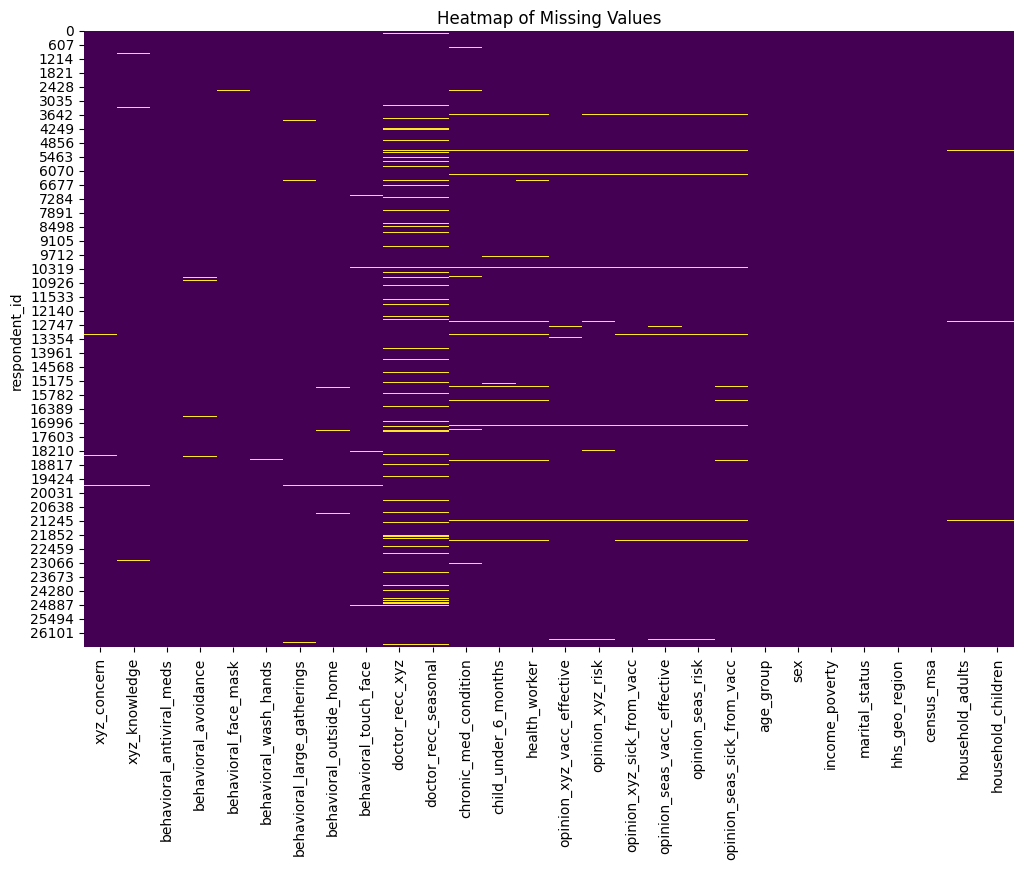

In [796]:
missing_values = X_train.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data=missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [797]:
# most_frequent_value1 = X_train['doctor_recc_seasonal'].mode()
# X_train['doctor_recc_seasonal'].fillna(most_frequent_value1, inplace=True)

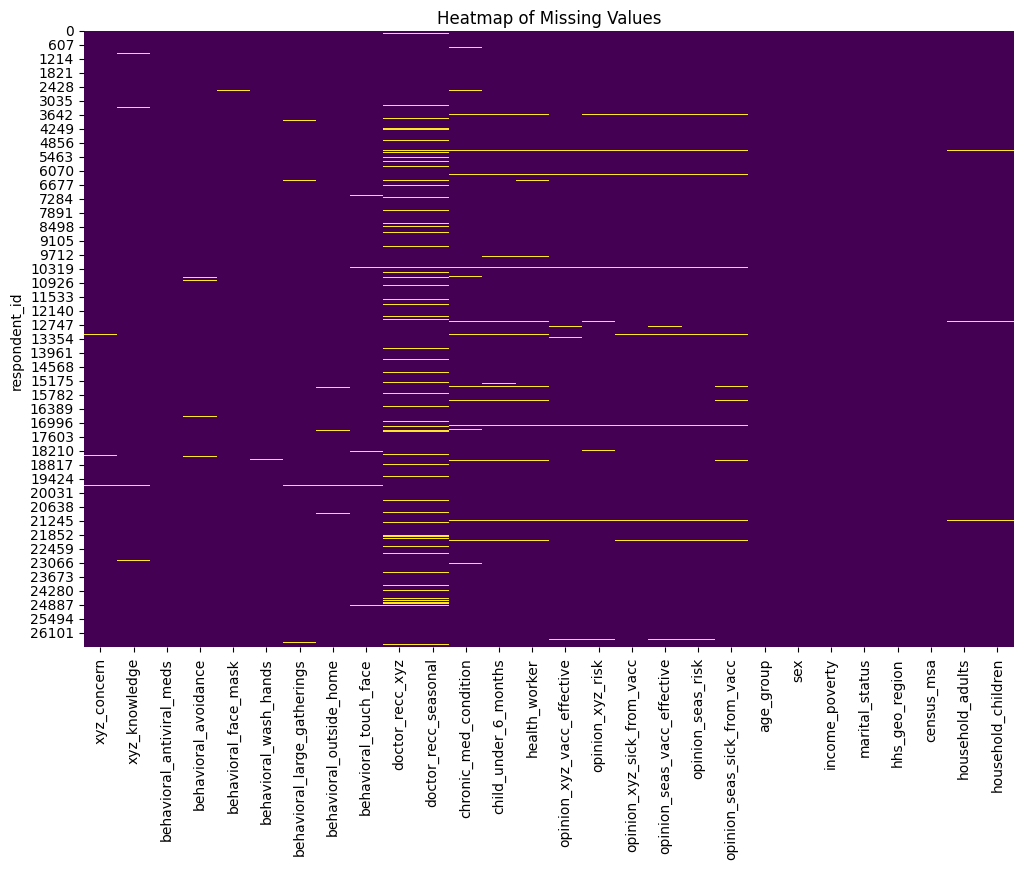

In [798]:
missing_values = X_train.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data=missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [799]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(strategy='median')
# Assuming X_train is your DataFrame with columns that have NaN values
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)



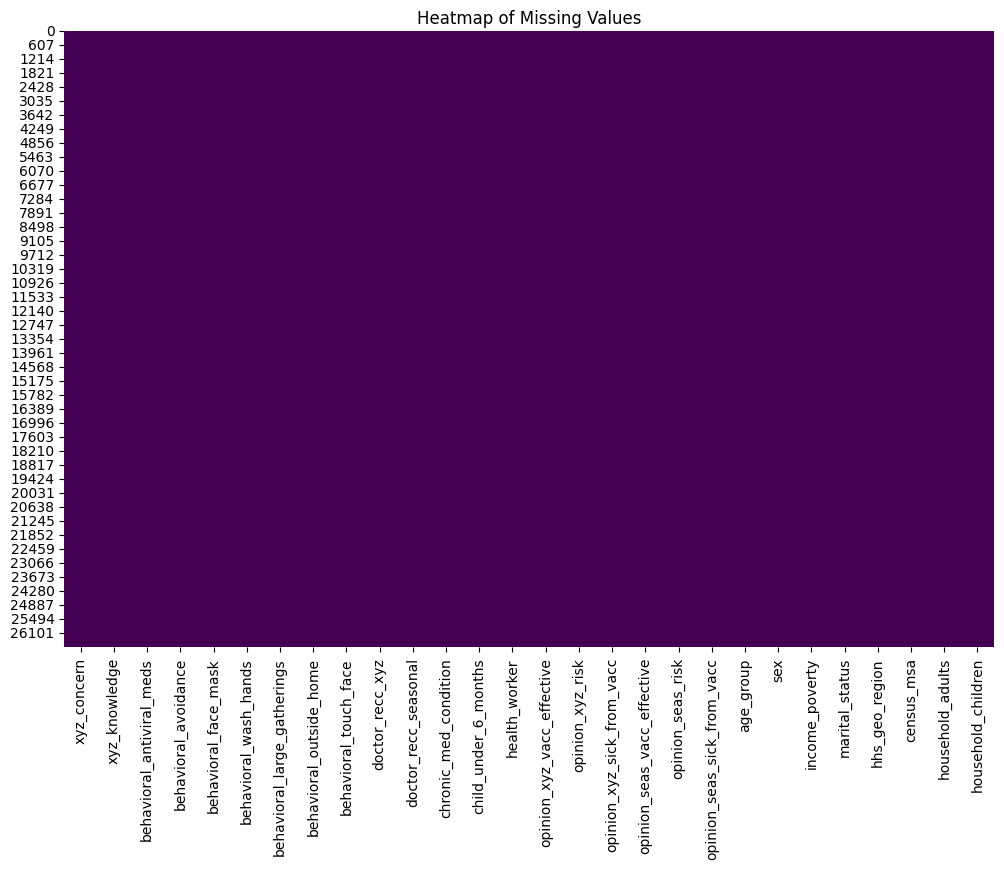

In [800]:
missing_values = X_train.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data=missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

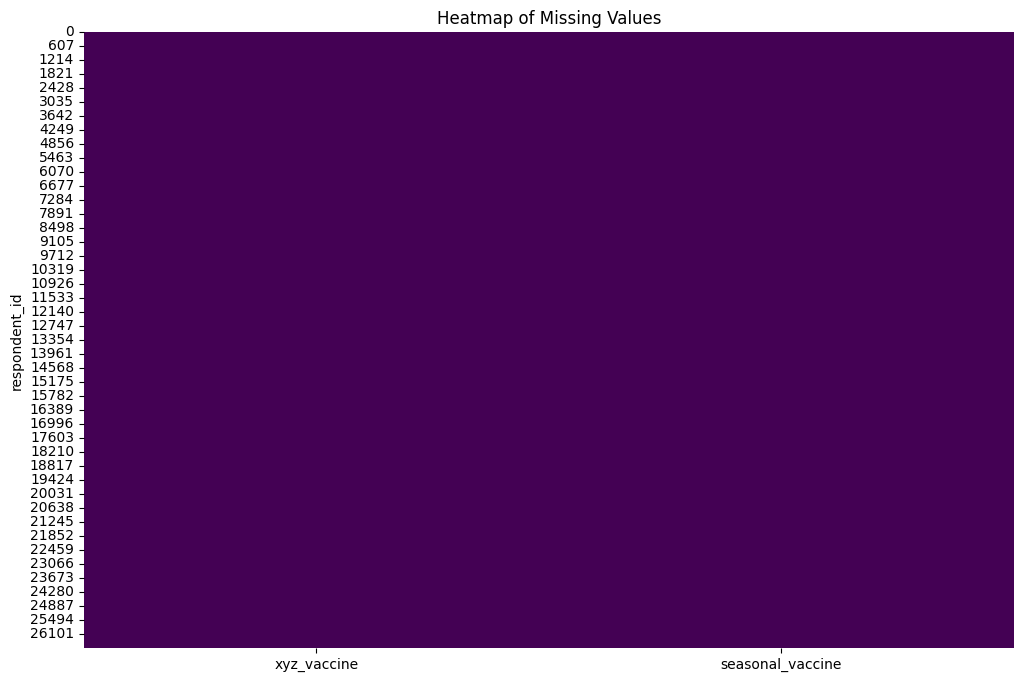

In [801]:
missing_values = y_train.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data=missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

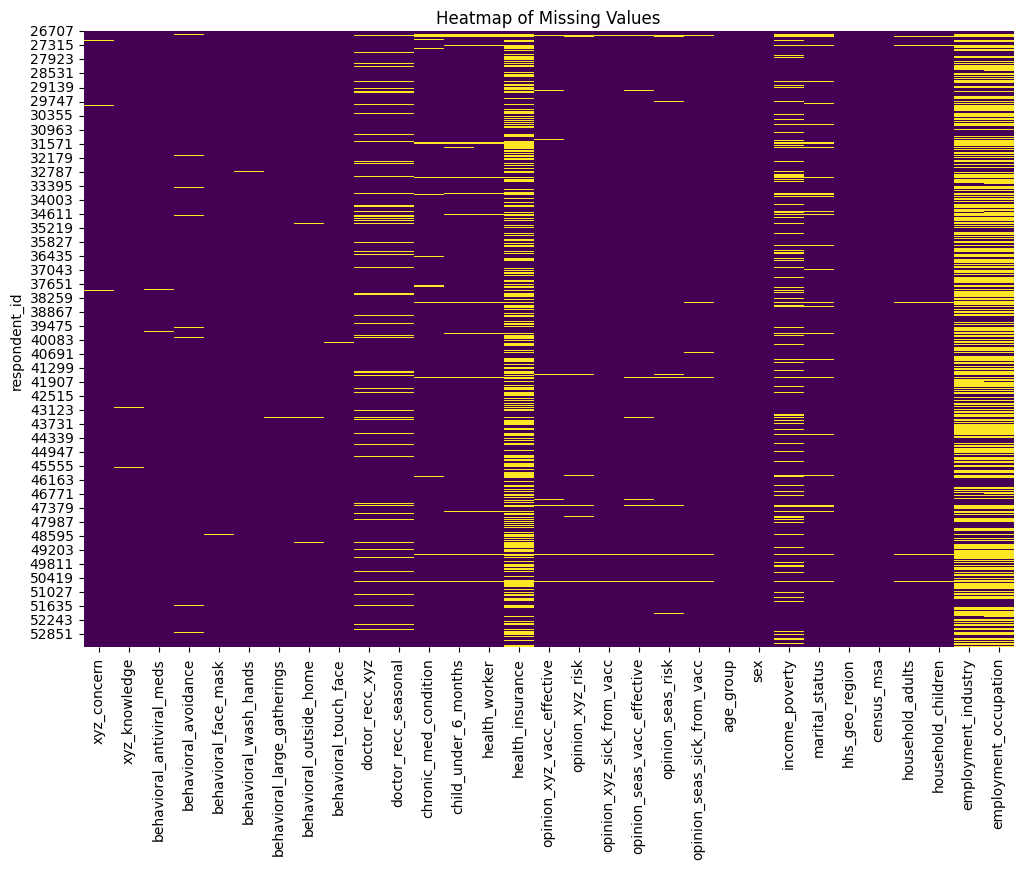

In [802]:
missing_values = X_test.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data=missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [803]:
categorical_columns = X_test.select_dtypes(include=['object']).columns

# Print the names of categorical columns
print(categorical_columns)

Index(['age_group', 'sex', 'income_poverty', 'marital_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupation'],
      dtype='object')


In [804]:
X_test.age_group.unique()


array(['35 - 44 Years', '18 - 34 Years', '55 - 64 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

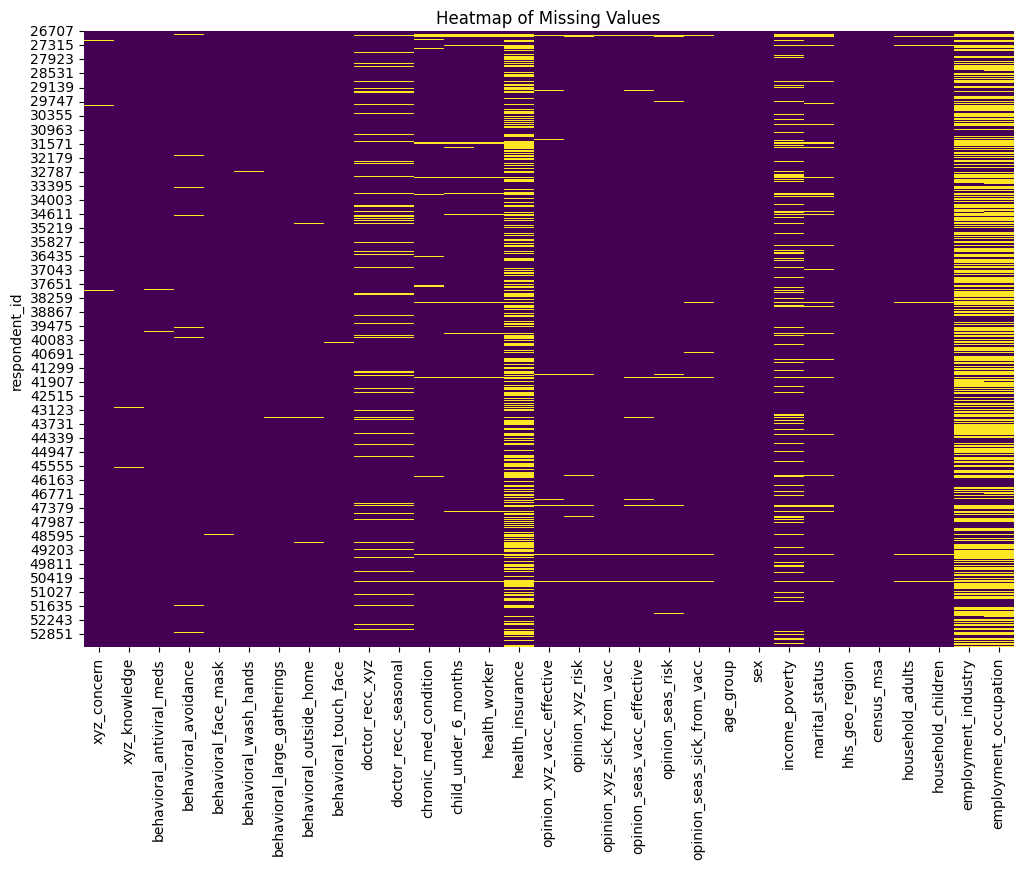

In [805]:
null_shape = X_test.isnull().columns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create a binary DataFrame indicating missing values
missing_values = X_test.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data=missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()





In [806]:
X_test.drop(['health_insurance', 'employment_industry', 'employment_occupation'], axis=1, inplace=True)
print(X_train.columns)

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'income_poverty', 'marital_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')


In [807]:
null_shape = X_test.isnull().columns
print(null_shape)

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'income_poverty', 'marital_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')


In [808]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Identify categorical columns
categorical_columns = X_test.select_dtypes(include=['object']).columns

# Replace null values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')
X_test[categorical_columns] = imputer.fit_transform(X_test[categorical_columns])

# Verify that null values are replaced
print(X_test[categorical_columns].isnull().sum())


age_group         0
sex               0
income_poverty    0
marital_status    0
hhs_geo_region    0
census_msa        0
dtype: int64


In [809]:
print(X_test.columns)

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'income_poverty', 'marital_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')


In [810]:
print(categorical_columns)

Index(['age_group', 'sex', 'income_poverty', 'marital_status',
       'hhs_geo_region', 'census_msa'],
      dtype='object')


In [811]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_test[['sex']])
# Transform 'sex' column and replace original 'sex' column
X_test['sex'] = ord_enc.transform(X_test[['sex']])
X_test.sex.head(5)


respondent_id
26707    0.0
26708    1.0
26709    1.0
26710    0.0
26711    0.0
Name: sex, dtype: float64

In [812]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_test[['marital_status']])
# Transform 'sex' column and replace original 'sex' column
X_test['marital_status'] = ord_enc.transform(X_test[['marital_status']])
X_test.marital_status.head(5)

respondent_id
26707    1.0
26708    1.0
26709    0.0
26710    0.0
26711    1.0
Name: marital_status, dtype: float64

In [813]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_test[['hhs_geo_region']])
# Transform 'sex' column and replace original 'sex' column
X_test['hhs_geo_region'] = ord_enc.transform(X_test[['hhs_geo_region']])
X_test.hhs_geo_region.head(5)

respondent_id
26707    7.0
26708    1.0
26709    5.0
26710    5.0
26711    6.0
Name: hhs_geo_region, dtype: float64

In [814]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_test[['census_msa']])
# Transform 'sex' column and replace original 'sex' column
X_test['census_msa'] = ord_enc.transform(X_test[['census_msa']])
X_test.census_msa.head(5)

respondent_id
26707    0.0
26708    2.0
26709    2.0
26710    0.0
26711    2.0
Name: census_msa, dtype: float64

In [815]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_test[['age_group']])
# Transform 'sex' column and replace original 'sex' column
X_test['age_group'] = ord_enc.transform(X_test[['age_group']])
X_test.age_group.head(5)


respondent_id
26707    1.0
26708    0.0
26709    3.0
26710    4.0
26711    1.0
Name: age_group, dtype: float64

In [816]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already fitted ord_enc on X_train[['sex']]
ord_enc = OrdinalEncoder()
ord_enc.fit(X_test[['income_poverty']])
# Transform 'sex' column and replace original 'sex' column
X_test['income_poverty'] = ord_enc.transform(X_test[['income_poverty']])
X_test.income_poverty.head(5)

respondent_id
26707    1.0
26708    2.0
26709    1.0
26710    0.0
26711    0.0
Name: income_poverty, dtype: float64

In [817]:
X_test.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                      float64
sex                            float64
income_poverty                 float64
marital_status                 float64
hhs_geo_region                 float64
census_msa               

In [818]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(strategy='median')
# Assuming X_train is your DataFrame with columns that have NaN values
imputer.fit(X_test)
X_test_imputed = imputer.transform(X_test)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

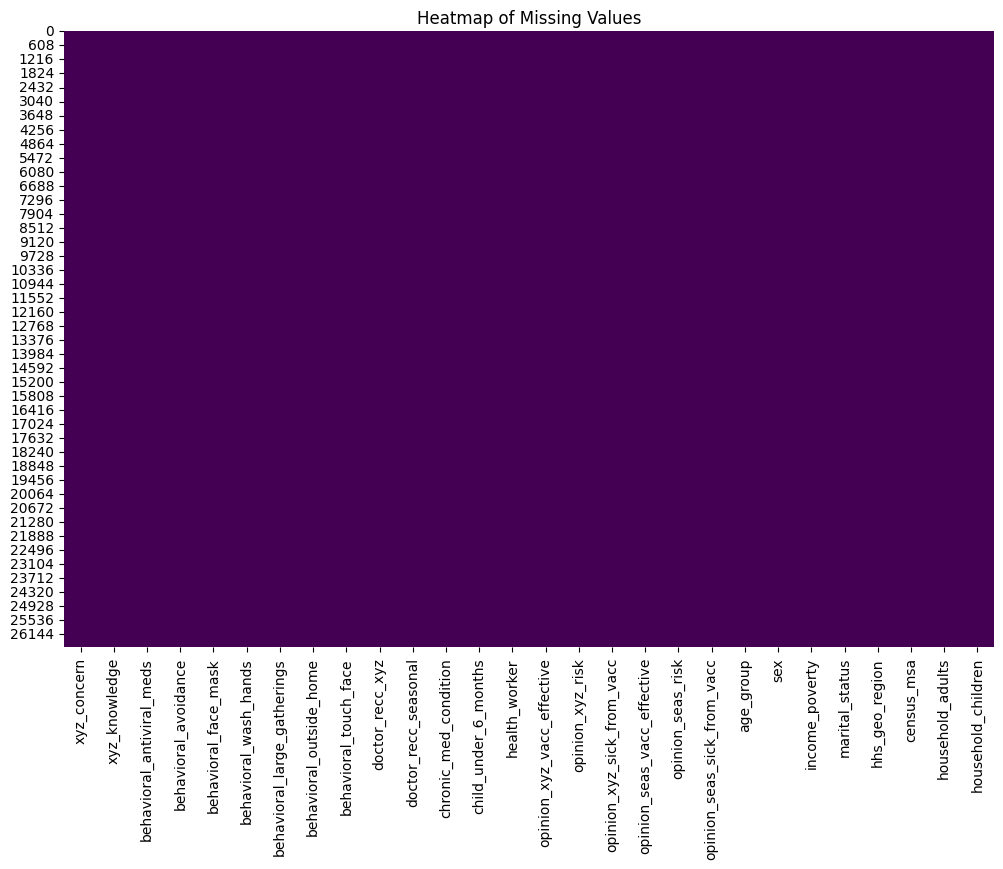

In [819]:
missing_values = X_test.isnull()

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data=missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [820]:
# encode categorical columns and fill in the null values for major columns and then use the code 
# clf = OneVsRestClassifier(LogisticRegression())
# clf.fit(X_train, y_train)
# pred = clf.predict(X_test)
# pred_prob = clf.predict_proba(X_test)

In [821]:
X_test.shape

(26708, 28)

In [822]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
pred_prob_df = pd.DataFrame(pred_prob, columns=['h1n1_vaccine', 'seasonal_vaccine'])

print(pred_prob_df)



       h1n1_vaccine  seasonal_vaccine
0          0.084981          0.250421
1          0.049503          0.057389
2          0.431813          0.665474
3          0.495774          0.887899
4          0.251888          0.528042
...             ...               ...
26703      0.330480          0.509195
26704      0.094009          0.315204
26705      0.128204          0.197001
26706      0.051611          0.410792
26707      0.557371          0.562906

[26708 rows x 2 columns]


In [823]:
respondent_id = y_test['respondent_id']

In [824]:
result_df = pd.concat([respondent_id, pred_prob_df], axis=1)
result_df.head(5)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.084981,0.250421
1,26708,0.049503,0.057389
2,26709,0.431813,0.665474
3,26710,0.495774,0.887899
4,26711,0.251888,0.528042


In [825]:
result_df.shape

(26708, 3)

In [826]:
# Check for null values in each column
null_columns = result_df.columns[result_df.isnull().any()]

if null_columns.empty:
    print("No columns have null values.")
else:
    print("Columns with null values:", null_columns.tolist())

No columns have null values.


In [827]:
# Save as CSV file
result_df.to_csv('result_df.csv', index=False)
